In [44]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as am

In [45]:

label = 'h_0.5_p_0.5_q_0.25'
file = open("data_{}.txt".format(label))

realisations = []
flag = True 
L = 255

n = 0 

while n < 10: 
    line = file.readline() 
    if line[0] == '#':
        flag = True 
        print(line)
    else: 
        if flag:  
            new_realisation = [line]
            realisations.append(new_realisation)
            n += 1 
            flag = False
        else:
            new_realisation.append(line)
            
realisations = realisations[:-1]

#Parameters={ Seed: 5, Branching rate: 0.5, p : 0.5, q : 0.25, Realisations: 100, Chunk size: 100, Dimension: 2, (Max) Lattice size: 255, Graph Type: 0 }

#Version: #c925

# Running for L = 255

# Starting the 0 th realisation 

# Starting the 1 th realisation 

# Starting the 2 th realisation 

# Starting the 3 th realisation 

# Starting the 4 th realisation 

# Starting the 5 th realisation 

# Starting the 6 th realisation 

# Starting the 7 th realisation 

# Starting the 8 th realisation 

# Starting the 9 th realisation 



In [46]:
def extract_evolution(realisation): 
    evolution = []
    edges = [] 
    passive_flag = False 
    active_flag = False
    for line in realisation:  
        if line.startswith('passive'):
            passive_indices = np.fromstring(line[8:-1], sep=',')
            passive_indices = np.unravel_index(passive_indices.astype('int'), (L, L))
            passive_flag = True 
        elif line.startswith('active'):
            active_indices = np.fromstring(line[7:-1], sep=',')
            try: 
                active_indices = np.unravel_index(active_indices.astype('int'), (L, L))
            except: 
                print(line, len(line[7:-1]), repr(line[7:-1]))
            active_flag = True 
        elif line.startswith('edge'): 
            edges.append(np.fromstring(line[5:-1], sep=','))
        else: 
            snapshot = np.zeros((L, L)) # clear the snapshot for the next time slice 
            
        if passive_flag and active_flag: 
            snapshot[passive_indices] = 1 # set occupied sites to 1 
            snapshot[active_indices] = 2 # set active sites to 2 
            evolution.append(snapshot)
            passive_flag = False 
            active_flag = False 
            
    return np.array(edges), np.array(evolution)

def make_movies(evolution, label):
    fig = plt.figure()
    ims = []
    plt.axis('off')
    for xy in evolution:
        im = plt.imshow(xy, animated=True, vmin=0, vmax=2, origin='lower') 
        plt.axis('off')
        ims.append([im])
        
    ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                    repeat_delay=1000)
    mywriter = am.FFMpegWriter()
    ani.save("{}_movie_{}.mp4".format(label, i), writer=mywriter)
    plt.close()  
    
        

In [47]:
for (i, realisation) in enumerate(realisations[:1]):
    edges, evolution = extract_evolution(realisation) 
    # make_movies(evolution, label)

In [48]:
print(edges.shape, evolution.shape)

(54281, 2) (311, 255, 255)


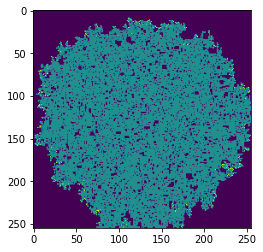

In [56]:
plt.imshow(evolution[-20])

In [57]:
print(edges[:10])

[[32512. 32257.]
 [32257. 32256.]
 [32256. 32255.]
 [32255. 32254.]
 [32254. 32509.]
 [32254. 31999.]
 [31999. 31998.]
 [31998. 31997.]
 [31998. 31743.]
 [32509. 32764.]]
